## Лабораторная работа 4

In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Явный метод

In [2]:
a = 0
b = 1
k = 1
T = 0.05
phi = lambda x: 0
g1 = lambda t: 0 #math.exp(t)
g2 = lambda t: 0 #math.exp(10*t)
f = lambda x, t: x
N = 100
# h = (b-a) / N
t = (((b-a) / N)**2) / 6

In [9]:
def explicit_method(N, t):
    num_t = int(T / t) + 1
    num_k = N + 1
    h = (b-a) / N
    matrix = np.zeros(shape=(num_t, num_k))


    matrix [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    coef = np.array([k * t / h**2, 1 - 2 * k * t / h**2, k * t / h**2]) # transpose

    for i in range(1, num_t):
        for j in range(1, num_k - 1):
            matrix[i][j] = matrix[i - 1, j-1:j+2].dot(coef) + t * f(a+j*h, i*t)
        matrix[i][-1] = matrix[i-1][-1] + h*g2(i*t)
    return matrix    

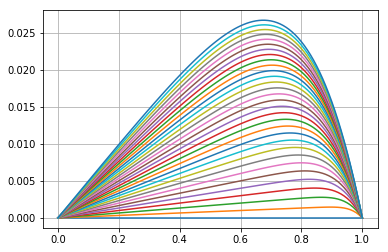

In [10]:
xs = np.linspace(a, b, N + 1)
sol = explicit_method(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()

## Неявный метод

In [3]:
def inexplicit_method(N, t):
    num_t = int(T / t) + 1
    num_k = N + 1
    h = (b-a) / N
    sol = np.zeros(shape=(num_t, num_k))

    sol [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])

    sol[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    matrix = np.zeros(shape=(num_k-1, num_k-1))
    matrix[0, 0:2] = [1 + 2*k*t / h ** 2, -k * t / h ** 2]
    for j in range(1, num_k-2):
            matrix[j, j-1] = - k * t / h ** 2 
            matrix[j, j] = 1 + 2*k*t / h ** 2
            matrix[j, j+1] = -k * t / h ** 2
    matrix[-1, -1] = 1 
    terms = np.zeros(num_k-1)
    for i in range(1, num_t):
        terms[0] = t*f(a+h, i*t) + sol[i-1, 1] + k * t / h ** 2 * sol[i, 0]
        for j in range(1, num_k-2):
            terms[j] = t*f(a+(j+1)*h, i*t) + sol[i-1, j+1]
        terms[-1] = t*g2(i*t) + sol[i-1, -1]
        sol[i, 1:] = np.linalg.solve(matrix, terms)
    return sol

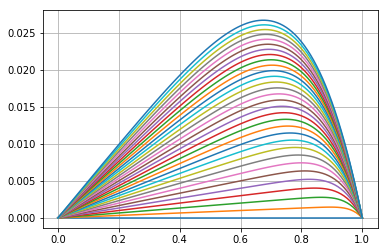

In [4]:
xs = np.linspace(a, b, N + 1)
sol = inexplicit_method(N, t)
for i in range(0, len(sol), 100):
    plt.plot(xs, sol[i], label=i)
plt.grid()
plt.show()